In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dates = pd.date_range('20240101', periods=6)
dates

DatetimeIndex(['2024-01-01', '2024-01-02', '2024-01-03', '2024-01-04',
               '2024-01-05', '2024-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
s = pd.Series([1, 2, 4, 'NaN', 6])
s

0      1
1      2
2      4
3    NaN
4      6
dtype: object

In [11]:
df1 = pd.DataFrame(np.random.randint(1, 100, size=(6,4)), index=dates, columns=list('ABCD'))
df1

,A,B,C,D
2024-01-01,14,90,75,5
2024-01-02,77,92,51,56
2024-01-03,75,77,2,50
2024-01-04,20,97,23,38
2024-01-05,88,49,63,33
2024-01-06,77,12,4,49


In [14]:
df2 = pd.DataFrame(
    {
        "A": 1.0,
        "B": pd.Timestamp("20130102"),
        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
        "D": np.array([3] * 4, dtype="int32"),
        "E": pd.Categorical(["test", "train", "test", "train"]),
        "F": "foo",
    }
)
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

In [78]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [19]:
df1.to_numpy()

array([[14, 90, 75,  5],
       [77, 92, 51, 56],
       [75, 77,  2, 50],
       [20, 97, 23, 38],
       [88, 49, 63, 33],
       [77, 12,  4, 49]], dtype=int32)

In [21]:
print(pd.__version__)

2.3.3


In [27]:
calories = {"day1": 420, "day2": 380, "day3": 390}

myvar = pd.Series(calories, index = ["day1", "day2"])

print(myvar)

day1    420
day2    380
dtype: int64


In [28]:
df = pd.read_csv('data.csv')

In [ ]:
df

In [37]:
pd.options.display.max_rows = 170

Cleaing the data:

In [ ]:
# Empty values 
x = df["Calories"].mode()[0]
df.fillna({'Calories' : x}, inplace=True)

In [40]:
# Wrong values
for x in df.index:
    if df["Duration"][x] > 120:
        df["Duration"][x] = 120

C:\Users\osaal\AppData\Local\Temp\ipykernel_15008\4216184323.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df["Duration"][x] = 120
C:\Users\osaal\AppData\Local\Temp\ipykernel_15008\4216184323.py:3: SettingWithCopyWarning: 
A value is t

In [ ]:
# Duplicate values
d = df.duplicated()
if d.any():
    print("There are duplicate rows in the DataFrame")

In [ ]:
# Remove duplicate rows
df.drop_duplicates(inplace = True)

In [ ]:
df

In [49]:
df.columns

Index(['Duration', 'Pulse', 'Maxpulse', 'Calories'], dtype='object')

In [62]:
# insure correct data types
df.dtypes

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object

In [63]:
df.corr()

,Duration,Pulse,Maxpulse,Calories
Duration,1.000000,-0.245729,-0.081582,0.81948
Pulse,-0.245729,1.000000,0.787035,0.01976
Maxpulse,-0.081582,0.787035,1.000000,0.19787
Calories,0.819480,0.019760,0.197870,1.00000


<Axes: >

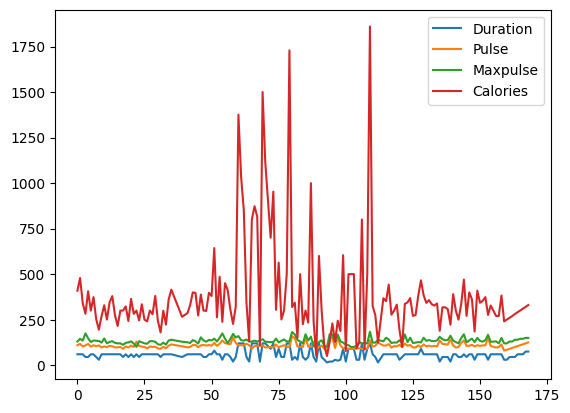

In [76]:
df.plot()


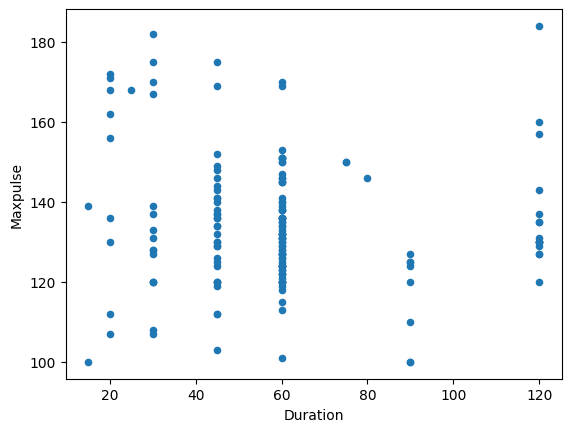

In [74]:
df.plot(kind = 'scatter', x = 'Duration', y = 'Maxpulse')

plt.show()

<Axes: ylabel='Frequency'>

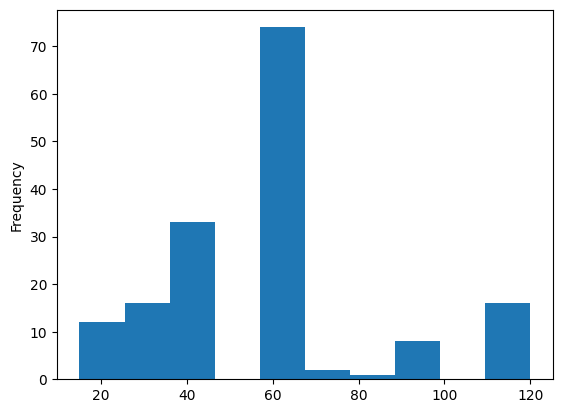

In [75]:
df["Duration"].plot(kind = 'hist')


In [ ]:
fruits = {
    ["Apples" : 30,
    "Bananas" : 21
}

df3 = pd.DataFrame(fruits, index = [0])

ValueError: If using all scalar values, you must pass an index